In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import pickle

In [100]:
Data = pd.read_csv('House Price Prediction Dataset.csv')
Data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [101]:
Data.drop(['Id'], axis = 1)

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1062,5,1,2,1903,Rural,Poor,No,476925
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [102]:
x = Data[['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Location', 'Condition', 'Garage']]
y = Data['Price']

In [103]:
numerical_cols = ["Area", "Bedrooms", "Bathrooms", "Floors", "YearBuilt"]
categorical_cols = ["Location", "Condition", "Garage"]

In [104]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_cols)
    ])

In [105]:
preprocessed_x = preprocessor.fit_transform(x)

In [106]:
preprocessed_x

array([[-1.10147065,  1.40179052,  1.30556821, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.14748543,  1.40179052,  1.30556821, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.62231712, -0.70458141, -0.49832569, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.33161794,  1.40179052, -1.40027264, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.9853011 , -0.00245743, -1.40027264, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.15661639,  1.40179052, -1.40027264, ...,  0.        ,
         0.        ,  0.        ]])

In [107]:
with open("Preprocessor.pkl", "wb") as file:
    pickle.dump(preprocessor, file)

In [108]:
x_train, x_test, y_train, y_test = train_test_split(preprocessed_x, y, test_size=0.2, random_state=42)

In [109]:
model = Sequential([
    Dense(256, activation="relu", input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.1),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.1),
    Dense(64, activation="relu"),
    Dense(1)  # Output layer for regression
])

D:\PYTHON\GENERATIVE AI\GENAI\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [110]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="mean_squared_error", metrics=["mae"])

In [111]:
early_stopping = EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

In [112]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 366892154880.0000 - mae: 537888.6250 - val_loss: 373349384192.0000 - val_mae: 543645.7500
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 353244774400.0000 - mae: 526008.3125 - val_loss: 373324611584.0000 - val_mae: 543622.9375
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 376420827136.0000 - mae: 548774.6875 - val_loss: 373254979584.0000 - val_mae: 543559.0625
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 360613216256.0000 - mae: 535459.5625 - val_loss: 373129445376.0000 - val_mae: 543443.7500
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 371486588928.0000 - mae: 541763.5000 - val_loss: 372913930240.0000 - val_mae: 543246.3125
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 363956207616.0000 - mae: 534419.1250 - val_loss: 372568064000.0000 - val_mae: 542924.6250
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 375003480064.0000 - mae: 545671.2500 - val_loss

In [113]:
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

Test Mean Absolute Error: 270811.03


In [114]:
model.save("house_price_model.h5")

In [115]:
y_pred = model.predict(x_test).flatten()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


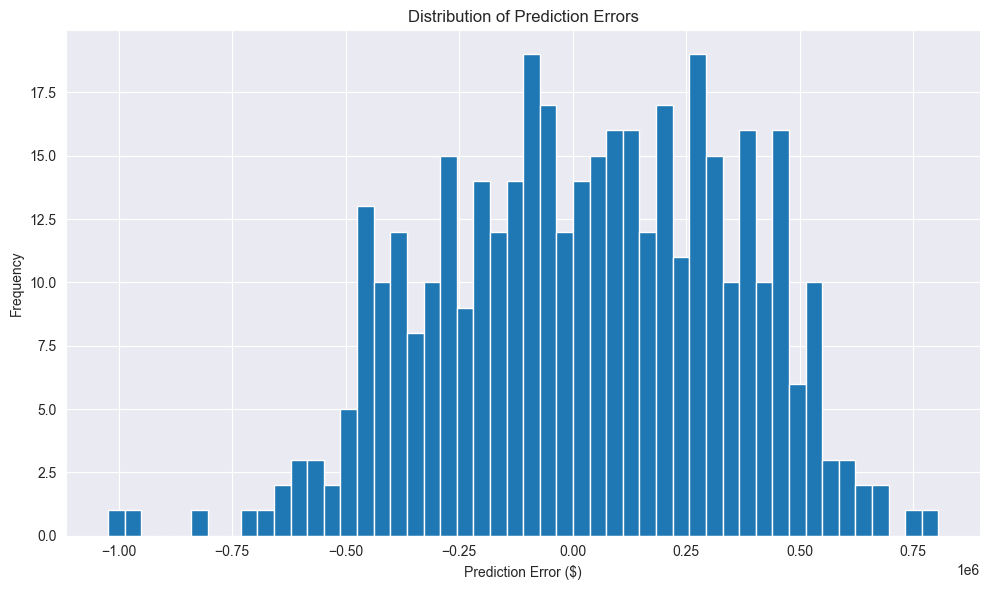

In [116]:
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50)
plt.xlabel("Prediction Error ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

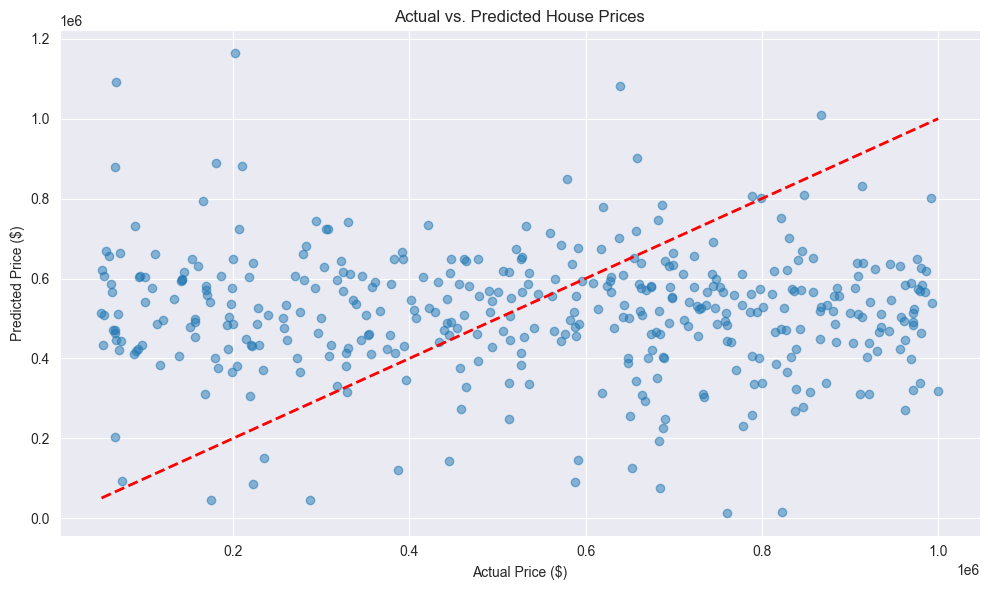

In [117]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs. Predicted House Prices")
plt.tight_layout()
plt.show


In [118]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [119]:
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): $270811.03
Mean Squared Error (MSE): 105447170048.00
Root Mean Squared Error (RMSE): $324726.30
R-squared (R²): -0.3554
